# How to extract data from yahoo finance


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
tickers = ['GOOG', 'AAPL', 'NVDA', 'MSFT', 'TSLA']

In [3]:
start = '2019-01-01'

In [4]:
data = yf.download(tickers, interval='1mo')['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [5]:
data.dropna(axis=0, inplace=True)
data

,AAPL,GOOG,MSFT,NVDA,TSLA
Date,,,,,
2010-07-01,7.831590,12.075986,19.931805,2.109075,1.329333
2010-08-01,7.400817,11.208488,18.124743,2.141204,1.298667
2010-09-01,8.638345,13.095664,19.013332,2.680522,1.360667
2010-10-01,9.162880,15.285207,20.705814,2.758551,1.456000
2010-11-01,9.472493,13.840871,19.611130,3.123450,2.355333
...,...,...,...,...,...
2022-08-01,156.741913,109.150002,260.182922,150.895157,275.609985
2022-09-01,137.971115,96.150002,232.245483,121.353935,265.250000
2022-10-01,153.086044,94.660004,231.477661,134.970001,227.539993


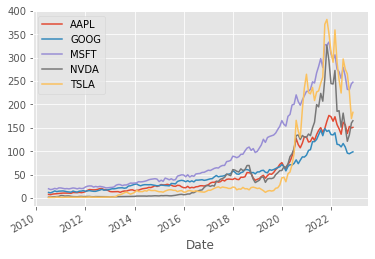

In [7]:
data.plot();

In [8]:
# Monthly returns of the assets
returns = data.pct_change().dropna()
returns

,AAPL,GOOG,MSFT,NVDA,TSLA
Date,,,,,
2010-08-01,-0.055005,-0.071837,-0.090662,0.015234,-0.023069
2010-09-01,0.167215,0.168370,0.049026,0.251876,0.047741
2010-10-01,0.060722,0.167196,0.089016,0.029109,0.070063
2010-11-01,0.033790,-0.094492,-0.052868,0.132279,0.617674
2010-12-01,0.036670,0.068849,0.111698,0.131521,-0.246250
...,...,...,...,...,...
2022-08-01,-0.032552,-0.064215,-0.068640,-0.168970,-0.072489
2022-09-01,-0.119756,-0.119102,-0.107376,-0.195773,-0.037589
2022-10-01,0.109551,-0.015497,-0.003306,0.112201,-0.142168


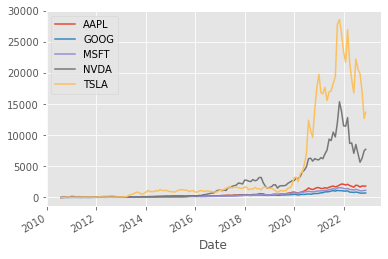

In [10]:
# if we want to see total returns of each stock
(((returns + 1).cumprod() - 1)*100).round(2).plot();

# TSLA is a winner